In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prince

In [4]:
df=pd.read_excel("Prueba Tecnica Analista de Datos.xlsx",skiprows=1,engine="openpyxl")
df = df.rename(columns={
    '26. La DEPRESIÓN es un trastorno del estado anímico en el que la persona se siente triste, melancólica y abatida en un nivel que interfiere con las actividades de la vida cotidiana durante un lapso de algunas semanas o meses. Sus síntomas son irritabilidad frecuente, dificultad para concentrarse, dificultad para conciliar el sueño o exceso de sueño, cambio grande en el apetito (exceso o pérdida), cansancio y falta de energía, dificultad para concentrarse, pensamientos repetitivos de muerte o suicidio, sentimientos de desesperanza o abandono y pérdida de la capacidad de disfrutar actividades que solían hacerlo feliz. Teniendo en cuenta la descripción anterior, ¿Qué tan probable cree que esté padeciendo DEPRESIÓN:': '26. ¿Qué tan probable cree que esté padeciendo DEPRESIÓN?',
    '27. Los trastornos de ANSIEDAD son estados en los que se experimentan sentimientos de miedo, temor o inquietud que no desaparecen y van empeorando con el tiempo, de tal forma que interfieren con la vida cotidiana, en las relaciones interpersonales, el trabajo o en estudio. Sus síntomas son sensación de peligro inminente, pánico o catástrofe, latidos cardíacos fuertes o rápidos, mareos, respiración acelerada, sudoración, temblores, problemas para concentrarse o para pensar en algo diferente al tema de preocupación, problemas gastrointestinales y problemas para conciliar el sueño. Teniendo en cuenta la descripción anterior, ¿Qué tan probable cree que esté padeciendo ANSIEDAD': '27. ¿Qué tan probable cree que esté padeciendo ANSIEDAD?'
})

In [5]:
df.head()

,# participante,Estado de la participación,Nivel general de satisfaccion,Eje 1- Organizacional,Orgullo por trabajar en la empresa,Recomendación,Beneficios,Bienestar,Balance,La empresa demuestra sensibilidad con las particularidades de la vida personal de sus empleados,...,Depresión Algún amigo cercano?,27. ¿Qué tan probable cree que esté padeciendo ANSIEDAD?,Ansiedad Usted?,Ansiedad Algún familiar cercano?,Ansiedad Algún amigo cercano?,28. Modalidad de trabajo,29. Antigüedad en la organización,30. Tipo de contrato,31. Ciudad / Región donde labora,32. Area en la que labora
0,Participante 1,Participación completa,9,NaN,4,3,3,4,3,3,...,1.0,NaN,3.0,1.0,1.0,Fuera de la casa (oficina o calle),Entre 1 y 5 años,Término Indefinido,NaN,Administrativo
1,Participante 2,Participación completa,8,NaN,4,3,2,4,3,3,...,3.0,NaN,3.0,1.0,3.0,Fuera de la casa (oficina o calle),Entre 1 y 5 años,Término Indefinido,NaN,Sede externa
2,Participante 3,ha participado pero todavía no ha concluído,9,NaN,4,4,3,2,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Participante 4,Participación completa,10,NaN,4,4,4,4,4,4,...,2.0,NaN,1.0,1.0,1.0,Fuera de la casa (oficina o calle),Entre 6 y 10 años,Término Indefinido,NaN,Lideres
4,Participante 5,Participación completa,10,NaN,4,4,4,4,4,4,...,1.0,NaN,1.0,1.0,1.0,Fuera de la casa (oficina o calle),Entre 6 y 10 años,Término Indefinido,NaN,Cartera


In [18]:
df1=df[df['Estado de la participación']=='Participación completa']
df1.shape

(215, 63)

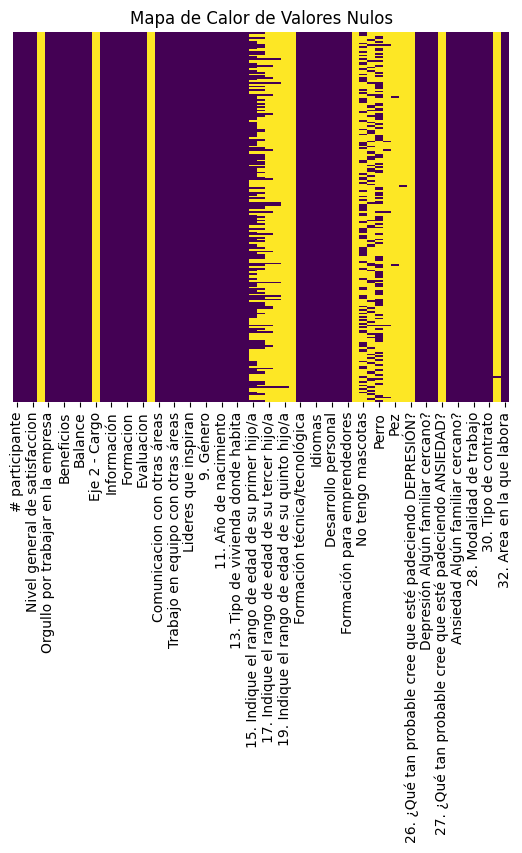

In [9]:
sns.heatmap(df1.isnull(), 
            cmap='viridis', 
            cbar=False,      
            yticklabels=False)

plt.title('Mapa de Calor de Valores Nulos')
plt.show()

In [30]:
columnas=df1.columns.to_list()
df=df1.copy()
for i in columnas:
    try:
        df[i]=df[i].astype('int').astype('object')
    except:
        df[i]=df[i].astype('object')

In [14]:
Eje1=['Orgullo por trabajar en la empresa', 'Recomendación', 'Beneficios',
       'Bienestar', 'Balance',
       'La empresa demuestra sensibilidad con las particularidades de la vida personal de sus empleados']
Eje2=['Recursos', 'Información', 'Cargo', 'Formacion',
       'Entrenamiento cargo', 'Evaluacion']
Eje3=['Comunicacion con otras áreas', 'Comunicación con el jefe',
       'Trabajo en equipo con otras áreas', 'Trabajo ene quipo con mi área',
       'Lideres que inspiran', 'Lideres que forman']

In [36]:
acm = prince.MCA(
    n_components=2,  
    random_state=42
)
acmEj1 = acm.fit(df[Eje1])
df_acm1 = acmEj1.transform(df[Eje1])

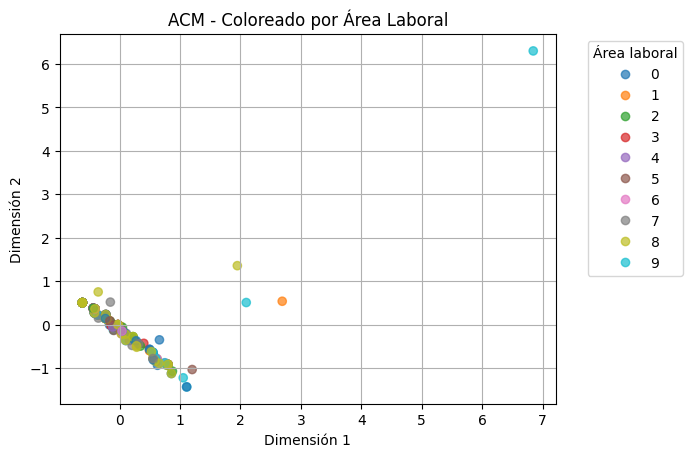

In [42]:
etiquetas = df['32. Area en la que labora']
scatter = plt.scatter(df_acm1[0], df_acm1[1], c=pd.factorize(etiquetas)[0], cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Área laboral", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('ACM - Coloreado por Área Laboral')
plt.grid(True)
plt.show()

In [ ]:
plt.scatter(df_acm[0], df_acm[1], alpha=0.5)
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Análisis de Componentes Múltiples (ACM)')
plt.grid(True)
plt.show()